# Data cleanup

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# initialize sklearn
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import multilabel_confusion_matrix,plot_confusion_matrix

# load data set from the PaDEL descriptor
# rename the columns in PadEL descriptor for polymer A
df_PadelA = pd.read_csv('all_molecules_namedv2.csv')
for column in df_PadelA.columns:
    if df_PadelA[column].isnull().values.any() == True: # if there are empty values in the column, drop it from the descriptor list
        df_PadelA = df_PadelA.drop(column,axis = 1)
df_PadelA.columns = ['A_' + col_name for col_name in df_PadelA.columns]

# rename the columns in PaDEL descriptor for polymer B
df_PadelB = pd.read_csv('all_molecules_namedv2.csv')
for column in df_PadelB.columns:
    if df_PadelB[column].isnull().values.any() == True: # if there are empty values in the column, drop it from the descriptor list
        df_PadelB = df_PadelB.drop(column,axis = 1)
df_PadelB.columns = ['B_' + col_name for col_name in df_PadelB.columns]  

# rename the columsn in PaDEL descriptor for Polymer C
df_PadelC = pd.read_csv('all_molecules_namedv2.csv')
for column in df_PadelC.columns:
    if df_PadelC[column].isnull().values.any() == True: # if there are empty values in the column, drop it from the descriptor list
        df_PadelC = df_PadelC.drop(column,axis = 1)
df_PadelC.columns = ['C_' + col_name for col_name in df_PadelC.columns]  

# rename the columsn in PaDEL descriptor for crosslinker1
df_Padelcross1 = pd.read_csv('all_molecules_namedv2.csv')
for column in df_Padelcross1.columns:
    if df_Padelcross1[column].isnull().values.any() == True: # if there are empty values in the column, drop it from the descriptor list
        df_Padelcross1 = df_Padelcross1.drop(column,axis = 1)
df_Padelcross1.columns = ['cross1_' + col_name for col_name in df_Padelcross1.columns]  

# rename the columsn in PaDEL descriptor for crosslinker2
df_Padelcross2 = pd.read_csv('all_molecules_namedv2.csv')
for column in df_Padelcross2.columns:
    if df_Padelcross2[column].isnull().values.any() == True: # if there are empty values in the column, drop it from the descriptor list
        df_Padelcross2 = df_Padelcross2.drop(column,axis = 1)
df_Padelcross2.columns = ['cross2_' + col_name for col_name in df_Padelcross2.columns] 

# rename the columsn in PaDEL descriptor for crosslinker3
df_Padelcross3 = pd.read_csv('all_molecules_namedv2.csv')
for column in df_Padelcross3.columns:
    if df_Padelcross3[column].isnull().values.any() == True: # if there are empty values in the column, drop it from the descriptor list
        df_Padelcross3 = df_Padelcross3.drop(column,axis = 1)
df_Padelcross3.columns = ['cross3_' + col_name for col_name in df_Padelcross3.columns] 

    
# load the data set
x = pd.read_csv('clean_data_v8.csv')
y_init = x['Compressive strength [Mpa]']

x_Padel = pd.DataFrame()

# names of monomers/biopolymers
names = ['collagen','agar','chitosan','AA','VA','gelatin','sodium alginate','EG',
         'oxidized starch','acrylamide','DMA','AMPS','EGDA','na','adipic acid','AlCl3','CaCl2',
         'citric acid','EDC','FeCl3','NHS','MBA','ethylene diamine','glycidyl methacrylate','PEGDA','NaOH'
        ]

for name in names:
# add descriptors to polymer A and polymer B and crosslinkers
    index_with_name = x[x['Polymer A name'] == name].index
    temp_new = df_PadelA[df_PadelA['A_Name'] == name]
    Padel_index = temp_new.index
    if len(index_with_name)!=0:
       
        for index in range(len(index_with_name)):
            #add descriptor for polymer A
            temp_old = x.iloc[index_with_name[index]]
            temp_new = df_PadelA.iloc[Padel_index[0]]
            s = pd.concat([temp_old,temp_new],axis = 0)
            
            #add descriptor for polymer B
            polymerBname = x['Polymer B name'].iloc[index] # find the name of polymer B
            temp_newB = df_PadelB[df_PadelB['B_Name'] == polymerBname]
            Padel_indexB = temp_newB.index
            s = pd.concat([s,df_PadelB.iloc[Padel_indexB[0]]],axis = 0)
            
            #add descriptor for polymer C
            polymerCname = x['Polymer C name'].iloc[index] # find the name of polymer C
            temp_newC = df_PadelC[df_PadelC['C_Name'] == polymerCname]
            Padel_indexC = temp_newC.index
            s = pd.concat([s,df_PadelC.iloc[Padel_indexC[0]]],axis = 0)
            
            #add descriptor for crosslinker 1
            cross1name = x['Crosslinker 1 name'].iloc[index] # find the name of crosslinker 1
            temp_newcross1 = df_Padelcross1[df_Padelcross1['cross1_Name'] == cross1name]
            Padel_indexcross1 = temp_newcross1.index
            s = pd.concat([s,df_Padelcross1.iloc[Padel_indexcross1[0]]],axis = 0)
            
            #add descriptor for crosslinker 2
            cross2name = x['Crosslinker 2 name'].iloc[index] # find the name of crosslinker 2
            temp_newcross2 = df_Padelcross2[df_Padelcross2['cross2_Name'] == cross2name]
            Padel_indexcross2 = temp_newcross2.index
            s = pd.concat([s,df_Padelcross2.iloc[Padel_indexcross2[0]]],axis = 0)
            
            #add descriptor for crosslinker 3
            cross3name = x['Crosslinker 3 name'].iloc[index] # find the name of crosslinker 3
            temp_newcross3 = df_Padelcross3[df_Padelcross3['cross3_Name'] == cross3name]
            Padel_indexcross3 = temp_newcross3.index
            s = pd.concat([s,df_Padelcross3.iloc[Padel_indexcross3[0]]],axis = 0)
            
            
            new_row = pd.DataFrame([s.tolist()], columns=s.index)
            x_Padel = x_Padel.append(new_row, ignore_index=True)

x_Padel = x_Padel.drop('Reference',axis = 1) # drop the references column
x_Padel = x_Padel.drop('Initiator name',axis = 1) # drop the initiator name
x_Padel = x_Padel.drop('Polymer A name',axis = 1) # drop the polymer A name
x_Padel = x_Padel.drop('Polymer B name',axis = 1) # drop the polymer B name
x_Padel = x_Padel.drop('Polymer C name',axis = 1) # drop the polymer C name
x_Padel = x_Padel.drop('A_Name',axis = 1) # drop the name from df_PadelA
x_Padel = x_Padel.drop('B_Name',axis = 1) # drop the name from df_PadelB
x_Padel = x_Padel.drop('C_Name',axis = 1) # drop the name from df_PadelB
x_Padel = x_Padel.drop('Crosslinker 1 name',axis = 1) # drop the crosslinker name
x_Padel = x_Padel.drop('Crosslinker 2 name',axis = 1) # drop the crosslinker name
x_Padel = x_Padel.drop('Crosslinker 3 name',axis = 1) # drop the crosslinker name
y = x_Padel['Compressive strength [Mpa]'] # target variable

x_Padel = x_Padel.drop('Compressive strength [Mpa]',axis = 1) # drop the target variable

In [104]:
# check final x_Padel size is correct
print(df_PadelA.shape[1] + df_PadelB.shape[1] + df_PadelC.shape[1] + x.shape[1] - 5-3 - 1, x_Padel.shape[1])

458 887


In [105]:
avg = pd.DataFrame() # initialize dataframe for encoded data
stdeviat = pd.DataFrame()
col_names = x_Padel.columns
x_en = pd.DataFrame()

for j in range(len(col_names)): # loop through columns of the data frame and encode all categorical columns into a list
    column = col_names[j] # get column names
    if x_Padel[column].dtype == object: # only numerically encode categorical columns
        temp1 = pd.get_dummies(x_Padel[column],prefix = column) # one hot encode multi-label features data
    else: # everything else remains the same
        temp1 = x_Padel[column]
    x_en = pd.concat([x_en,temp1],axis =1) # encoded data
    
x_en2 = pd.DataFrame() # encoded and standardized data

for column in x_en.columns:
    # standardize everything 
    meanX = np.mean(x_en[column])
    stdX = np.std(x_en[column])
    temp2 = (x_en[column]-meanX)/stdX # standardize the continuous data
    avg[column] = [meanX] #store the mean data
    stdeviat[column] = [stdX] # store the stdev data 
    
    x_en2 = pd.concat([x_en2,temp2],axis =1) # encoded and standardized data
print(x_en2.shape)

(90, 894)


In [106]:
print(x_en2.shape)
# check for empty values and drop excess ones
for column in x_en2.columns:
    if x_en2[column].isnull().values.any() == True:
        x_en2 = x_en2.drop(column, axis = 1)
        
# final check
print('Anymore null values: ',x_en2.isnull().values.any())
print('Final size of the encoded data:',x_en2.shape)


(90, 894)
Anymore null values:  False
Final size of the encoded data: (90, 331)


# Exploratory data analysis

In [107]:
import matplotlib
# plot the counts of monomer/polymer name that got >=1MPa or < 1MPa of the data that is not encoded
good_y = y_init.index[y_init>=1] # find the index of target variables >=1MPa
bad_y = y_init.index[y <1] # find the index of target variables <=1MPa

data_good = x.iloc[good_y] # separate the feaures that >1MPa compressive strength
data_bad = x.drop(index = good_y) # separate the features that produced <1MPa compressive strength

# get the monomer/polymer names and see the number of times it produced >1MPa or <1MPa compressive strength
values = np.zeros(len(names)) # initializing count values
good_dict =  dict(zip(names, values)) # initializing dictionary with polymer/monomer names that produced >1MPa
bad_dict =  dict(zip(names, values)) # initializing dictionay with polymer/monomer names that produced <1MPa

# find the polymer/monomer name and add counts for targets >1MPa compressive strength
for name in data_good['Polymer A name']: 
    good_dict[name] = good_dict[name] + 1     
for name in data_good['Polymer B name']:
    good_dict[name] = good_dict[name] + 1
for name in data_good['Polymer C name']:
    good_dict[name] = good_dict[name] + 1

# find the polymer/monomer name and add counts for targets <1MPa compressive strength
for name in data_bad['Polymer A name']:
    bad_dict[name] = bad_dict[name] + 1      
for name in data_bad['Polymer B name']:
    bad_dict[name] = bad_dict[name] + 1
for name in data_bad['Polymer C name']:
    bad_dict[name] = bad_dict[name]
                        
bad_dict.pop('na') # remove na polymer name
good_dict.pop('na') # remove na polymer name

22.0

In [108]:
# plot the counts of crosslinkers that gave >1MPa and <1MPa compressive stress
# get the monomer/polymer names and see the number of times it produced >1MPa or <1MPa compressive strength
cross_names = ['MBA','adipic acid', 'EDC','NHS','mTG enzyme (102 U/g)','CaCl2','NaOH','FeCl3','PEGDA','citric acid','na', 'AlCl3','glycidyl methacrylate','ethylene diamine']

values = np.zeros(len(cross_names)) # initializing count values
good_dict2 =  dict(zip(cross_names, values)) # initializing dictionary with polymer/monomer names that produced >1MPa
bad_dict2 =  dict(zip(cross_names, values)) # initializing dictionay with polymer/monomer names that produced <1MPa

# find the polymer/monomer name and add counts for targets >1MPa compressive strength
for name in data_good['Crosslinker 1 name']: 
    good_dict2[name] = good_dict2[name] + 1     
for name in data_good['Crosslinker 2 name']:
    good_dict2[name] = good_dict2[name] + 1
for name in data_good['Crosslinker 3 name']:
    good_dict2[name] = good_dict2[name] + 1

# find the polymer/monomer name and add counts for targets <1MPa compressive strength
for name in data_bad['Crosslinker 1 name']:
    bad_dict2[name] = bad_dict2[name] + 1      
for name in data_bad['Crosslinker 2 name']:
    bad_dict2[name] = bad_dict2[name] + 1
for name in data_bad['Crosslinker 3 name']:
    bad_dict2[name] = bad_dict2[name]
                        
bad_dict2.pop('na') # remove na crosslinker name
good_dict2.pop('na') # remove na crosslinker name


28.0

In [109]:
# plot the counts of inititators and accelerators that gave >1MPa and <1MPa compressive stress
init_names = ['na','photo','thermal']
acceler_names = ['na','TEMED']

values = np.zeros(len(init_names)) # initializing count values
good_dict3 =  dict(zip(init_names, values)) # initializing dictionary with polymer/monomer names that produced >1MPa
bad_dict3 =  dict(zip(init_names, values)) # initializing dictionay with polymer/monomer names that produced <1MPa

# find the polymer/monomer name and add counts for targets >1MPa compressive strength
for name in data_good['Initiation type']: 
    good_dict3[name] = good_dict3[name] + 1     

# find the polymer/monomer name and add counts for targets <1MPa compressive strength
for name in data_bad['Initiation type']:
    bad_dict3[name] = bad_dict3[name] + 1      

values = np.zeros(len(acceler_names)) # initializing count values
good_dict4 =  dict(zip(acceler_names, values)) # initializing dictionary with polymer/monomer names that produced >1MPa
bad_dict4 =  dict(zip(acceler_names, values)) # initializing dictionay with polymer/monomer names that produced <1MPa

# find the polymer/monomer name and add counts for targets >1MPa compressive strength
for name in data_good['Accelerator name']: 
    good_dict4[name] = good_dict4[name] + 1     

# find the polymer/monomer name and add counts for targets <1MPa compressive strength
for name in data_bad['Accelerator name']:
    bad_dict4[name] = bad_dict4[name] + 1      


([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

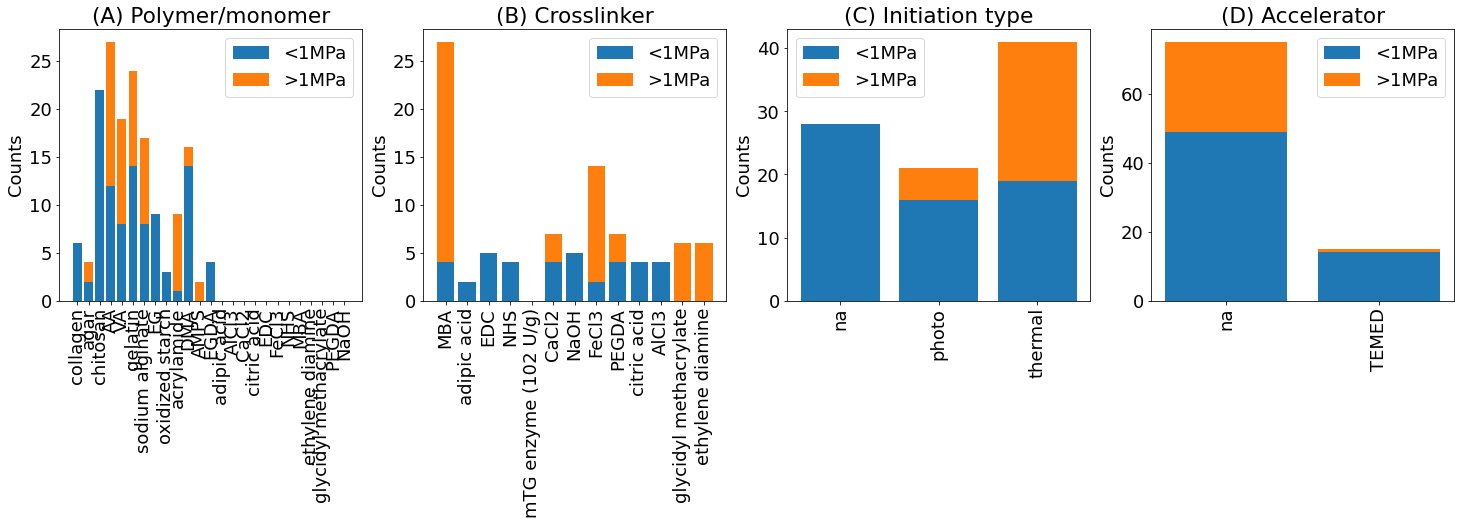

In [110]:
# plot all the figures of the distribution of initiator, polymer/monomer, crosslinkers and accelerators
# plot figure
fig = plt.figure(figsize = (25,5))
matplotlib.rcParams.update({'font.size': 18})
ax = fig.add_subplot(1,4,1)
plt.bar(bad_dict.keys(),bad_dict.values())
bad_list = list(bad_dict.values()) # convert to list to make a stacked bar chart
plt.bar(good_dict.keys(),good_dict.values(), bottom = bad_list)
plt.legend(['<1MPa','>1MPa'])
plt.ylabel('Counts')
plt.title('(A) Polymer/monomer')
plt.xticks(rotation =90)

ax = fig.add_subplot(1,4,2)
plt.bar(bad_dict2.keys(),bad_dict2.values())
bad_list2 = list(bad_dict2.values()) # convert to list to make a stacked bar chart
plt.bar(good_dict2.keys(),good_dict2.values(), bottom = bad_list2)
plt.legend(['<1MPa','>1MPa'])
plt.ylabel('Counts')
plt.title('(B) Crosslinker')
plt.xticks(rotation =90)

ax = fig.add_subplot(1,4,3)
plt.bar(bad_dict3.keys(),bad_dict3.values())
bad_list3 = list(bad_dict3.values()) # convert to list to make a stacked bar chart
plt.bar(good_dict3.keys(),good_dict3.values(), bottom = bad_list3)
plt.legend(['<1MPa','>1MPa'])
plt.ylabel('Counts')
plt.title('(C) Initiation type')
plt.xticks(rotation =90)

ax = fig.add_subplot(1,4,4)
plt.bar(bad_dict4.keys(),bad_dict4.values())
bad_list4 = list(bad_dict4.values()) # convert to list to make a stacked bar chart
plt.bar(good_dict4.keys(),good_dict4.values(), bottom = bad_list4)
plt.legend(['<1MPa','>1MPa'])
plt.ylabel('Counts')
plt.title('(D) Accelerator')
plt.xticks(rotation =90)

Text(0.5, 1.0, '(B)')

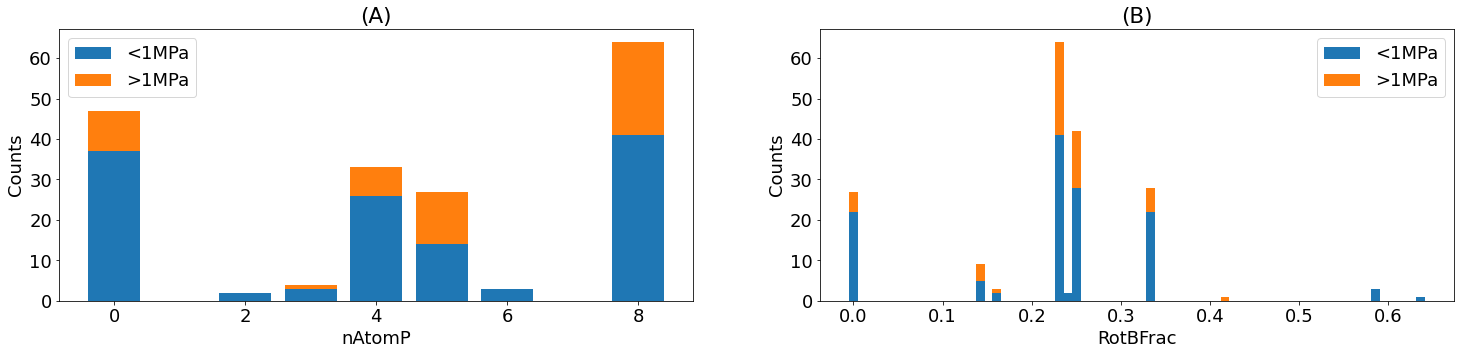

In [111]:
# molecular descriptor distribution plots
good_y = y.index[y>=1]
data_good2 = x_en.iloc[good_y] # separate the feaures that >1MPa compressive strength
data_bad2 = x_en.drop(index = good_y) # separate the features that produced <1MPa compressive strength

names = list(x_en['A_nAtomP'].unique())
names2 = list(x_en['B_nAtomP'].unique())

for num in names2: # add RotBFrac values from polymer B to polymer A list
    if num not in names:
        names.append(num)

values = np.zeros(len(names)) # initializing count values
good_dict5 =  dict(zip(names, values))
bad_dict5 =  dict(zip(names, values))

for value in data_good2['A_nAtomP']:
    good_dict5[value] = good_dict5[value] + 1
for value in data_good2['B_nAtomP']:
    good_dict5[value] = good_dict5[value] + 1
for value in data_bad2['A_nAtomP']:
    bad_dict5[value] = bad_dict5[value] + 1
for value in data_bad2['B_nAtomP']:
    bad_dict5[value] = bad_dict5[value] + 1       

names3 = list(x_en['A_RotBFrac'].unique())
names4 = list(x_en['B_RotBFrac'].unique())

for num in names4: # add RotBFrac values from polymer B to polymer A list
    if num not in names3:
        names3.append(num)

values = np.zeros(len(names3)) # initializing count values
good_dict6 =  dict(zip(names3, values))
bad_dict6 =  dict(zip(names3, values))

for value in data_good2['A_RotBFrac']:
    good_dict6[value] = good_dict6[value] + 1
for value in data_good2['B_RotBFrac']:
    good_dict6[value] = good_dict6[value] + 1
for value in data_bad2['A_RotBFrac']:
    bad_dict6[value] = bad_dict6[value] + 1
for value in data_bad2['B_RotBFrac']:
    bad_dict6[value] = bad_dict6[value] + 1       

    
widths = np.ones(len(names3))*0.01
fig = plt.figure(figsize = (25,5))
ax = fig.add_subplot(1,2,1)
plt.bar(bad_dict5.keys(),bad_dict5.values() )
bad_list5 = list(bad_dict5.values())
plt.bar(good_dict5.keys(),good_dict5.values(), bottom = bad_list5)
plt.legend(['<1MPa','>1MPa'])
plt.xlabel('nAtomP')
plt.ylabel('Counts')
plt.title('(A)')

ax = fig.add_subplot(1,2,2)
plt.bar(bad_dict6.keys(),bad_dict6.values(),width = widths)
bad_list6 = list(bad_dict6.values())
plt.bar(good_dict6.keys(),good_dict6.values(),width = widths,bottom = bad_list6)
plt.legend(['<1MPa','>1MPa'])
plt.xlabel('RotBFrac')
plt.ylabel('Counts')
plt.title('(B)')

([<matplotlib.patches.Wedge at 0x1c1e9545df0>,
 [Text(0.6465637441936395, 0.8899187180267095, '>1MPa'),
  Text(-0.6465637441936395, -0.8899187180267095, '<1MPa')],
 [Text(0.3526711331965306, 0.48541020983275057, '30.0%'),
  Text(-0.3526711331965306, -0.48541020983275057, '70.0%')])

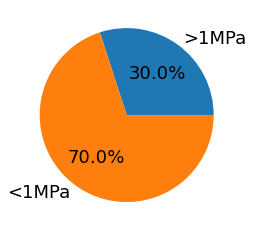

In [112]:
#plot the distribution of the target variable in the data
y_new = [] # initialize binary encoded target variable 
size_1 = 0
size_2 = 0
for ii in range(len(y)):
    if y.iloc[ii] >= 1.0:
        y_new.append(1)
        size_1 += 1
    else:
        y_new.append(0)
        size_2 += 1
        
plt.pie([size_1, size_2], labels = ['>1MPa','<1MPa'],autopct='%1.1f%%')

# Feature selection

In [113]:
# find feature importance - logistic regression - accuracy vs number of features used
acc_train = []
acc_test = []

x_train, x_test, y_train, y_test = train_test_split(x_en2, y_new, stratify = y_new, test_size=0.20, random_state=0)

model = LogisticRegression(solver = 'liblinear')
model.fit(x_train, y_train) # fit the logistic regression

# visualize feature importance
coefficients_list = model.coef_.tolist()[0]
features_list = x_train.columns.values.tolist()
abs_coeff = []
for coeff in coefficients_list: # take the absolute value of the coefficients to get the largest magnitude to smallest values for importance
    abs_coeff.append(abs(coeff))
feature_series = pd.Series(data = abs_coeff,index = features_list)
features_series_order = feature_series.sort_values(ascending = False) # sort feature importance by coefficient values  

for iii in range(1,x_en2.shape[1]+1):
    keep_features = features_series_order.index[0:iii]
    x_en_keep = x_en2[keep_features]
    
    x_train1, x_test1, y_train1, y_test1 = train_test_split(x_en_keep, y_new, stratify = y_new, test_size=0.20, random_state=0)

    model = LogisticRegression(solver = 'liblinear',penalty = 'l2')
    model.fit(x_train1, y_train1) # fit the logistic regression

    y_pred = model.predict(x_train1) # predict variable from model using training set
    y_pred2 = model.predict(x_test1)

    acc_train.append(metrics.accuracy_score(y_train1,y_pred))
    acc_test.append(metrics.accuracy_score(y_test1,y_pred2))

In [114]:
# find the feature importance - random forest model - plot accuracy vs number of important features used
acc_train2 = []
acc_test2 = []

x_train, x_test, y_train, y_test = train_test_split(x_en2, y_new, stratify = y_new, test_size=0.20, random_state=0)

model_2 = RandomForestClassifier(n_estimators = 500)
model_2.fit(x_train,y_train) # fit the model

features_list = x_train.columns.values.tolist()
feature_importances = pd.Series(model_2.feature_importances_,index = features_list)
feature_importances = feature_importances.sort_values(ascending = False)

for iiii in range(1,x_en2.shape[1]+1):
    keep_features2 = feature_importances.index[0:iiii]
    x_en_keep2 = x_en2[keep_features2]

    x_train2, x_test2, y_train2, y_test2 = train_test_split(x_en_keep2, y_new, stratify = y_new, test_size=0.20, random_state=0)

    model_2 = RandomForestClassifier(n_estimators = 500)
    model_2.fit(x_train2,y_train2) # fit the model

    pred2 = model_2.predict(x_train2) # predict using split training data
    pred2b = model_2.predict(x_test2)
    
    acc_train2.append(metrics.accuracy_score(y_train2, pred2)) # create list of accuracy score in each fold
    acc_test2.append(metrics.accuracy_score(y_test2,pred2b))

In [115]:
# find the feature importance using ranking from random forest model - MLP model - plot accuracy vs number of important features
acc_train3 = []
acc_test3 = []

x_train, x_test, y_train, y_test = train_test_split(x_en2, y_new, stratify = y_new, test_size=0.20, random_state=0)

model_3 = MLPClassifier(hidden_layer_sizes=20,max_iter = 1000) # 20 hidden units and one layer    
model_3.fit(x_train,y_train) # fit the model

for h in range(1,x_en2.shape[1]+1):
    keep_features3 = feature_importances.index[0:h]
    x_en_keep3 = x_en2[keep_features3]    

    x_train3, x_test3, y_train3, y_test3 = train_test_split(x_en_keep3, y_new, stratify = y_new, test_size=0.20, random_state=0)

    model_3 = MLPClassifier(hidden_layer_sizes=20,max_iter = 1000) # 20 hidden units and one layer    
    model_3.fit(x_train3,y_train3) # fit the model
    
    pred3 = model_3.predict(x_train3) # predict using split training data
    pred3b = model_3.predict(x_test3)
    
    acc_train3.append(metrics.accuracy_score(y_train3, pred3)) # create list of accuracy score in each fold
    acc_test3.append(metrics.accuracy_score(y_test3,pred3b))

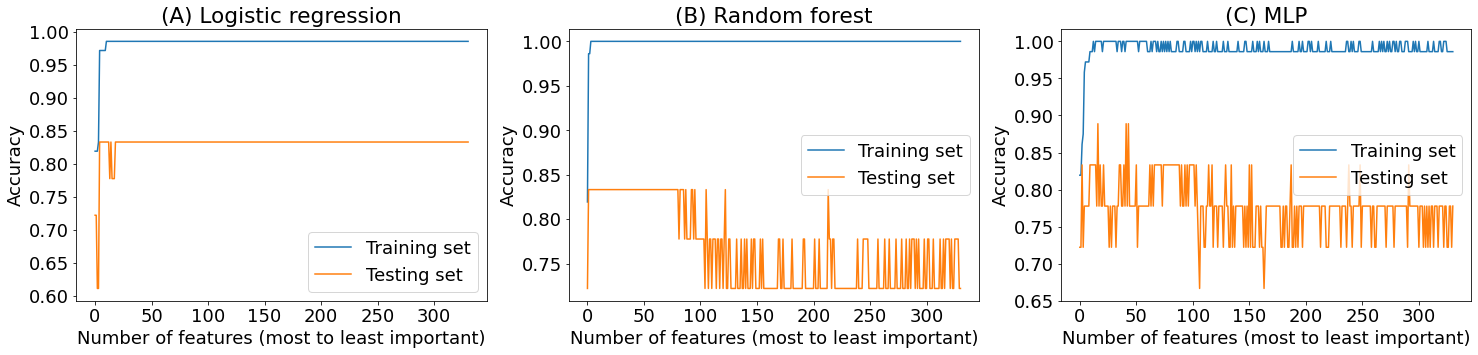

In [116]:
# plotting for all models the accuracy vs number of features
fig = plt.figure(figsize = (25,5))
ax = fig.add_subplot(1,3,1) # create subplots
plt.plot(acc_train)
plt.plot(acc_test)
plt.legend(['Training set','Testing set'])
plt.xlabel('Number of features (most to least important)')
plt.ylabel('Accuracy')
plt.title('(A) Logistic regression')
ax = fig.add_subplot(1,3,2)
plt.plot(acc_train2)
plt.plot(acc_test2)
plt.legend(['Training set','Testing set'])
plt.xlabel('Number of features (most to least important)')
plt.ylabel('Accuracy')
plt.title('(B) Random forest')
ax = fig.add_subplot(1,3,3)
plt.plot(acc_train3)
plt.plot(acc_test3)
plt.legend(['Training set','Testing set'])
plt.xlabel('Number of features (most to least important)')
plt.ylabel('Accuracy')
plt.title('(C) MLP')
matplotlib.rcParams.update({'font.size': 14})

Text(0.5, 1.0, '(B) Random forest')

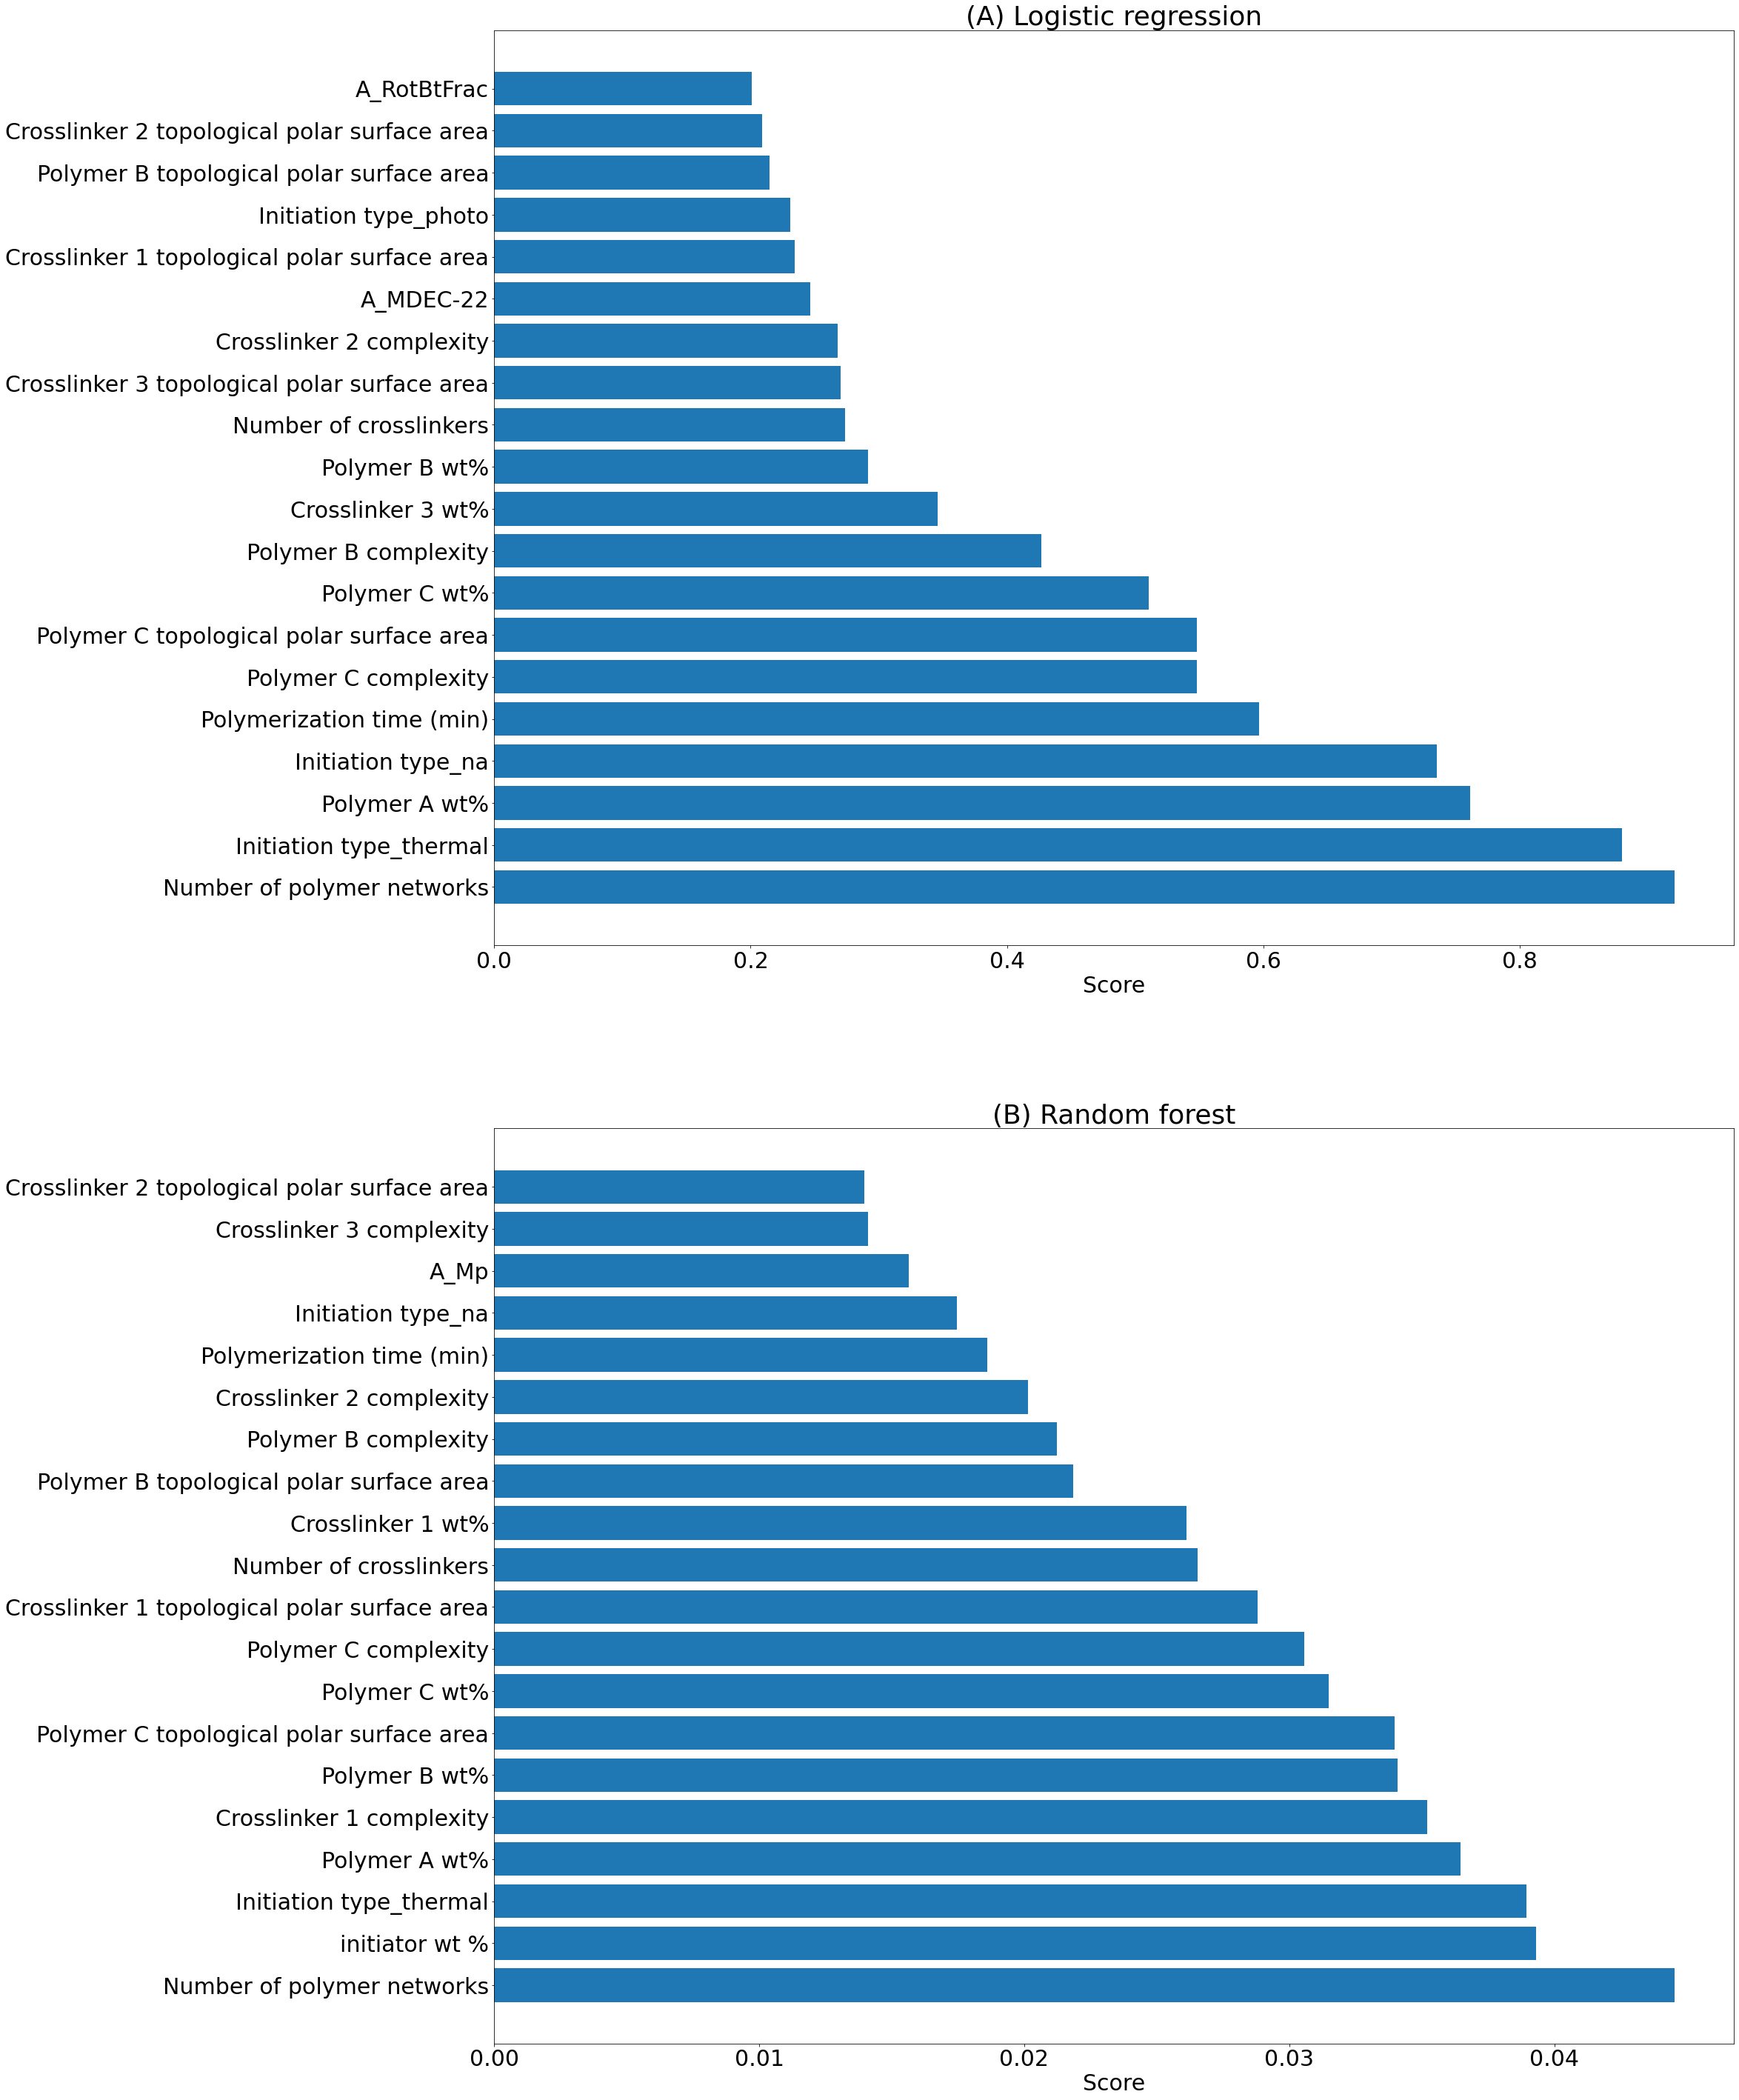

In [151]:
# plot feature importance from logistic and random forest model
fig = plt.figure(figsize = (30,50))
matplotlib.rcParams.update({'font.size': 30})

ax = fig.add_subplot(2,1,1) # create subplots
plt.barh(features_series_order.index[0:20],features_series_order.array[0:20])
plt.xlabel('Score')
plt.title('(A) Logistic regression')

ax = fig.add_subplot(2,1,2) # create subplots
plt.barh(feature_importances.index[0:20],feature_importances.array[0:20])
plt.xlabel('Score')
plt.title('(B) Random forest')

# Model fit

In [119]:
# 10 cross fold validation with Stratified k folds
k = 10 # number of folds
kf = StratifiedKFold(n_splits=k, random_state = 1, shuffle = True)

In [121]:
# Model 1 - Logistic regression using training data 80:20 split
acc_score1 = [] # initialize the accuracy score list

keep_features = features_series_order.index[0:20] # use the top 20 features
x_en_keep = x_en2[keep_features]

x_train, x_test, y_train, y_test = train_test_split(x_en_keep, y_new, stratify = y_new, test_size=0.20, random_state=0)
y_train = pd.DataFrame(y_train)

for train, test in kf.split(x_train,y_train): # loop through different folds for cross validation
    model_1 = LogisticRegression(solver= 'liblinear',penalty = 'l2')
    model_1.fit(x_train.iloc[train],np.ravel(y_train.iloc[train])) # fit the model
    pred1 = model_1.predict(x_train.iloc[test]) # predict using split training data
    
    acc_score1.append(metrics.accuracy_score(np.ravel(y_train.iloc[test]), pred1)) # create list of accuracy score in each fold
    
print(acc_score1)

[1.0, 0.875, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8571428571428571, 0.8571428571428571, 1.0]


In [122]:
# Model 2 - Random forest classifier using training data 80:20 split
acc_score2 = []

keep_features2 = feature_importances.index[0:20] # use the top 20 features
x_en_keep2 = x_en2[keep_features2]

x_train, x_test, y_train, y_test = train_test_split(x_en_keep2, y_new, stratify = y_new, test_size=0.20, random_state=0)
y_train = pd.DataFrame(y_train)

for train, test in kf.split(x_train,y_train):
    model_2 = RandomForestClassifier(n_estimators = 500)
    model_2.fit(x_train.iloc[train],np.ravel(y_train.iloc[train])) # fit the model
    pred2 = model_2.predict(x_train.iloc[test]) # predict using split training data
    
    acc_score2.append(metrics.accuracy_score(y_train.iloc[test], pred2)) # create list of accuracy score in each fold
    
print(acc_score2)

[0.75, 0.875, 1.0, 1.0, 1.0, 0.8571428571428571, 1.0, 1.0, 0.7142857142857143, 0.8571428571428571]


In [123]:
# Model 3 - MLP using training data 80:20 split
n_cols = x_train.shape[1] # number of columns in the feature dataframe

acc_score4 = [] # initialize the list for accuracy score
keep_features = feature_importances.index[0:20] # use the top 20 features
x_en_keep = x_en2[keep_features]

x_train, x_test, y_train, y_test = train_test_split(x_en_keep, y_new, stratify = y_new, test_size=0.20, random_state=0)
y_train = pd.DataFrame(y_train)

for train, test in kf.split(x_train,y_train):    # loop through the folds
    model_4 = MLPClassifier(hidden_layer_sizes=20,max_iter = 1000) # 20 hidden units and one layer
    model_4.fit(x_train.iloc[train],np.ravel(y_train.iloc[train])) # fit the model
    pred4 = model_4.predict(x_train.iloc[test]) # predict using split training data
    
    score_nn = metrics.accuracy_score(y_train.iloc[test], pred4)
    acc_score4.append(score_nn) # create list of accuracy score in each fold
    
print(acc_score4)

[1.0, 0.75, 1.0, 0.8571428571428571, 1.0, 1.0, 1.0, 0.8571428571428571, 0.8571428571428571, 1.0]


### SMOTE + cross validation

[1.0, 1.0, 1.0, 0.8, 1.0, 0.9, 1.0, 0.9, 1.0, 0.9]


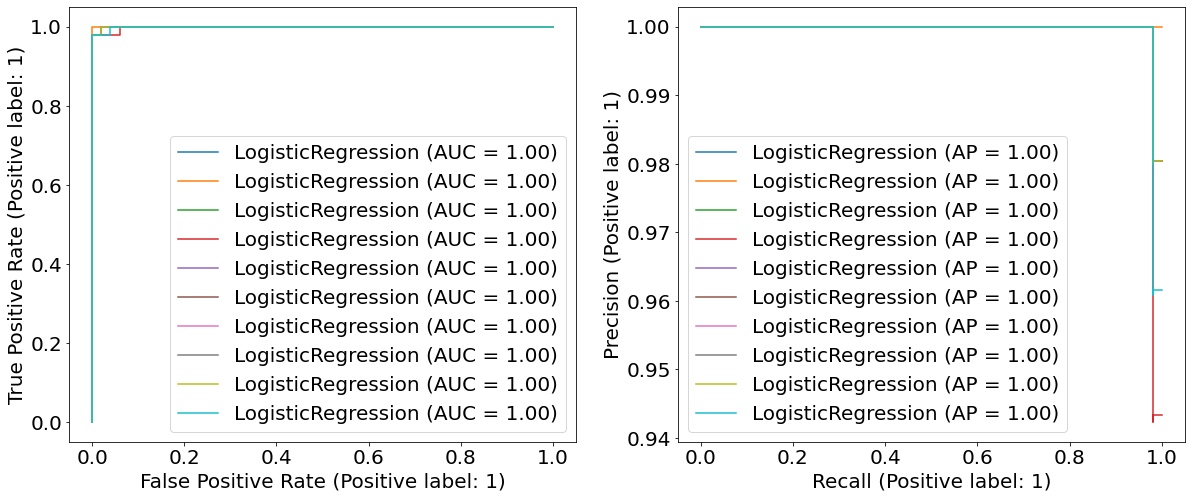

In [124]:
# Model 1 - Logistic regression using training data - SMOTE + cross validation
from imblearn.over_sampling import SMOTE

keep_features = features_series_order.index[0:20] # use the top 20 features
x_en_keep = x_en2[keep_features]

x_train, x_test, y_train, y_test = train_test_split(x_en_keep, y_new, stratify = y_new, test_size=0.20, random_state=0)

sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)
y_train_res = pd.DataFrame(y_train_res)

acc_score1_SMOTE = [] # initialize the accuracy score list
fig = plt.figure(figsize=(20,8))
matplotlib.rcParams.update({'font.size': 20})
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
for train, test in kf.split(x_train_res,y_train_res): # loop through different folds for cross validation
    model_1 = LogisticRegression(solver= 'liblinear',penalty = 'l2')
    model_1.fit(x_train_res.iloc[train],np.ravel(y_train_res.iloc[train])) # fit the model
    pred1 = model_1.predict(x_train_res.iloc[test]) # predict using split training data
    
    
    acc_score1_SMOTE.append(metrics.accuracy_score(np.ravel(y_train_res.iloc[test]), pred1)) # create list of accuracy score in each fold
    metrics.plot_roc_curve(model_1, x_train_res, y_train_res,ax = ax)
    metrics.plot_precision_recall_curve(model_1, x_train_res, y_train_res, ax = ax2) 
print(acc_score1_SMOTE)

[0.9, 0.9, 1.0, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9]


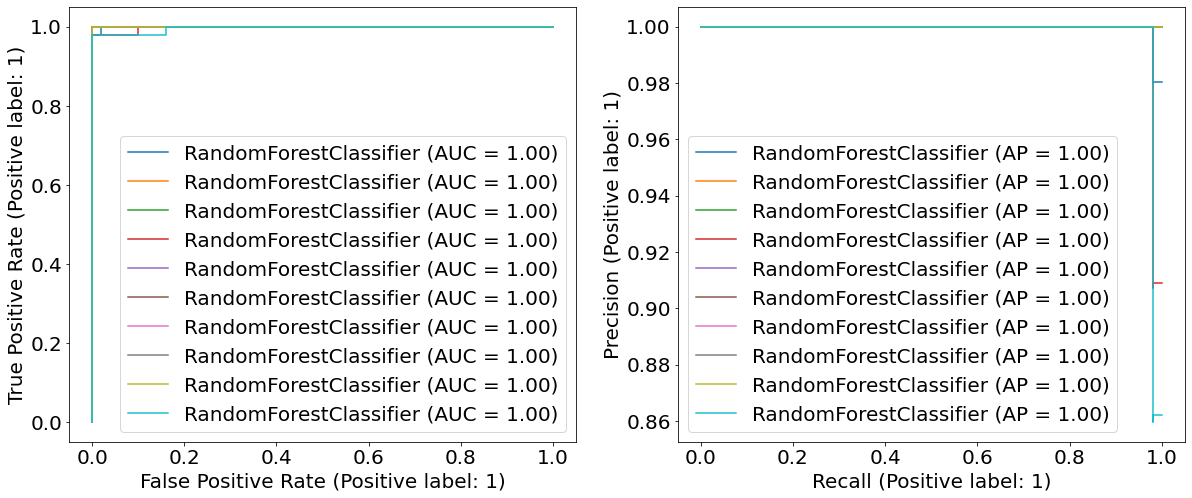

In [125]:
# Model 2 - random forest model using training data - SMOTE + cross validation
acc_score2_SMOTE = [] # initialize the accuracy score list

keep_features2 = feature_importances.index[0:20] # use the top 20 features
x_en_keep2 = x_en2[keep_features2]

x_train, x_test, y_train, y_test = train_test_split(x_en_keep2, y_new, stratify = y_new, test_size=0.20, random_state=0)

sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)
y_train_res = pd.DataFrame(y_train_res)

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

for train, test in kf.split(x_train_res,y_train_res): # loop through different folds for cross validation
    model_2 = RandomForestClassifier(n_estimators = 500)
    model_2.fit(x_train_res.iloc[train],np.ravel(y_train_res.iloc[train])) # fit the model
    pred2 = model_2.predict(x_train_res.iloc[test]) # predict using split training data
    
    acc_score2_SMOTE.append(metrics.accuracy_score(np.ravel(y_train_res.iloc[test]), pred2)) # create list of accuracy score in each fold
    metrics.plot_roc_curve(model_2, x_train_res, y_train_res,ax = ax)
    metrics.plot_precision_recall_curve(model_2, x_train_res, y_train_res, ax = ax2) 
print(acc_score2_SMOTE)

[0.7, 0.5, 0.5, 0.4, 0.7, 0.6, 0.7, 0.5, 0.9, 0.8]


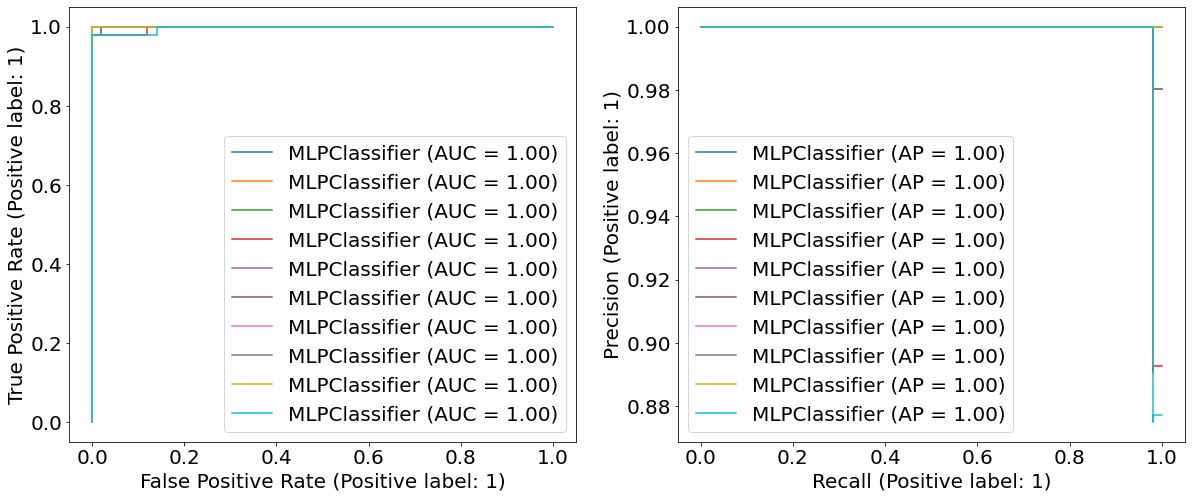

In [126]:
# Model 3 - MLP model using the training data - SMOTE + cross validation
from imblearn.over_sampling import SMOTE

keep_features3 = feature_importances.index[0:20] # keep the features
x_en_keep3 = x_en2[keep_features3]

x_train, x_test, y_train, y_test = train_test_split(x_en_keep3, y_new, stratify = y_new, test_size=0.20, random_state=0)

sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)
y_train_res = pd.DataFrame(y_train_res)

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
acc_score3_SMOTE = [] # initialize the accuracy score list

for train, test in kf.split(x_train_res,y_train_res): # loop through different folds for cross validation
    model_3 = MLPClassifier(hidden_layer_sizes=20,max_iter = 1000)
    model_3.fit(x_train_res.iloc[train],np.ravel(y_train_res.iloc[train])) # fit the model
    pred3 = model_1.predict(x_train_res.iloc[test]) # predict using split training data
    
    acc_score3_SMOTE.append(metrics.accuracy_score(np.ravel(y_train_res.iloc[test]), pred3)) # create list of accuracy score in each fold
    metrics.plot_roc_curve(model_3, x_train_res, y_train_res,ax = ax)
    metrics.plot_precision_recall_curve(model_3, x_train_res, y_train_res, ax = ax2) 
print(acc_score3_SMOTE)

(0.4, 1.01)

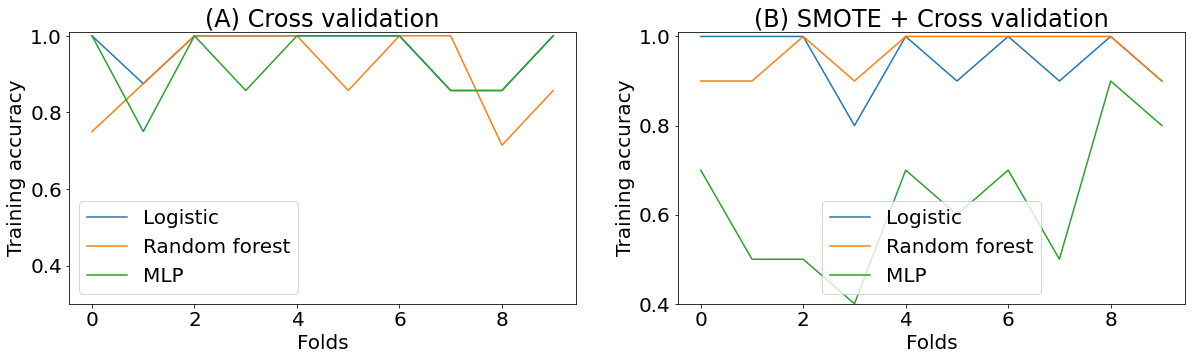

In [127]:
# plot without SMOTE vs with SMOTE
fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(1,2,1)
plt.plot(acc_score1)
plt.plot(acc_score2)
plt.plot(acc_score4)
plt.xlabel('Folds')
plt.ylabel('Training accuracy')
plt.legend(['Logistic', 'Random forest', 'MLP'])
plt.title('(A) Cross validation')
plt.ylim([0.3,1.01])

ax = fig.add_subplot(1,2,2)
plt.plot(acc_score1_SMOTE)
plt.plot(acc_score2_SMOTE)
plt.plot(acc_score3_SMOTE)
plt.xlabel('Folds')
plt.ylabel('Training accuracy')
plt.legend(['Logistic', 'Random forest', 'MLP'])
plt.title('(B) SMOTE + Cross validation')
plt.ylim([0.4,1.01])

# Model tuning

In [128]:
# GridsearchCV for model tuning of logistic regression
C = np.logspace(0,3,20) # regularization coefficient
logist_parameters = dict(C=C) # dictionary of hyperparameters

keep_features = features_series_order.index[0:20] # keep the features
x_en_keep = x_en2[keep_features]

x_train1b, x_test1b, y_train1b, y_test1b = train_test_split(x_en_keep, y_new, stratify = y_new, test_size=0.20, random_state=0)

sm = SMOTE(random_state = 2)
x_train_res1b, y_train_res1b = sm.fit_resample(x_train1b, y_train1b)
y_train_res1b = pd.DataFrame(y_train_res1b)

logistic = LogisticRegression(solver = 'liblinear',penalty = 'l2')
clf1 = GridSearchCV(logistic,logist_parameters,cv=10,verbose = 3) # gridsearchcv for logistic regression

best1 = clf1.fit(x_train_res1b,np.ravel(y_train_res1b)) # fit the data with the best parameters for training data
best_pred1b = best1.predict(x_train_res1b) # predictiongs of training data
best_pred1a = best1.predict(x_test1b) # predictions from the encoded testing set split from training data csv

print('Best hyperparameters = ',best1.best_estimator_.get_params())

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10] END ............................C=1.0;, score=0.900 total time=   0.0s
[CV 2/10] END ............................C=1.0;, score=0.900 total time=   0.0s
[CV 3/10] END ............................C=1.0;, score=1.000 total time=   0.0s
[CV 4/10] END ............................C=1.0;, score=1.000 total time=   0.0s
[CV 5/10] END ............................C=1.0;, score=1.000 total time=   0.0s
[CV 6/10] END ............................C=1.0;, score=1.000 total time=   0.0s
[CV 7/10] END ............................C=1.0;, score=1.000 total time=   0.0s
[CV 8/10] END ............................C=1.0;, score=0.900 total time=   0.0s
[CV 9/10] END ............................C=1.0;, score=1.000 total time=   0.0s
[CV 10/10] END ...........................C=1.0;, score=1.000 total time=   0.0s
[CV 1/10] END .............C=1.4384498882876628;, score=0.900 total time=   0.0s
[CV 2/10] END .............C=1.438449888287662

[CV 3/10] END ..............C=54.55594781168517;, score=1.000 total time=   0.0s
[CV 4/10] END ..............C=54.55594781168517;, score=1.000 total time=   0.0s
[CV 5/10] END ..............C=54.55594781168517;, score=1.000 total time=   0.0s
[CV 6/10] END ..............C=54.55594781168517;, score=1.000 total time=   0.0s
[CV 7/10] END ..............C=54.55594781168517;, score=1.000 total time=   0.0s
[CV 8/10] END ..............C=54.55594781168517;, score=0.800 total time=   0.0s
[CV 9/10] END ..............C=54.55594781168517;, score=1.000 total time=   0.0s
[CV 10/10] END .............C=54.55594781168517;, score=1.000 total time=   0.0s
[CV 1/10] END ..............C=78.47599703514611;, score=0.900 total time=   0.0s
[CV 2/10] END ..............C=78.47599703514611;, score=0.900 total time=   0.0s
[CV 3/10] END ..............C=78.47599703514611;, score=1.000 total time=   0.0s
[CV 4/10] END ..............C=78.47599703514611;, score=1.000 total time=   0.0s
[CV 5/10] END ..............

In [129]:
# GridsearchCV for model tuning random forest
rfc_parameters = {'n_estimators':[80,500,1000],'max_depth':[8, 9, 10, 11, 12], 'random_state':[0]}
rfc = RandomForestClassifier()
clf2 = GridSearchCV(rfc,rfc_parameters,cv=10, verbose =3) # gridsearchcv for random forest classifier

keep_features2 = feature_importances.index[0:20] # keep the features
x_en_keep2 = x_en2[keep_features2]

x_train2b, x_test2b, y_train2b, y_test2b = train_test_split(x_en_keep2, y_new, stratify = y_new, test_size=0.20, random_state=0)

sm = SMOTE(random_state = 2)
x_train_res2b, y_train_res2b = sm.fit_resample(x_train2b, y_train2b)
y_train_res2b = pd.DataFrame(y_train_res2b)

best2 = clf2.fit(x_train_res2b,np.ravel(y_train_res2b)) # fit the data with the best parameters for training data
best_pred2b = best2.predict(x_train_res2b) # predictiongs of training data
best_pred2a = best2.predict(x_test2b) # predictions from the split encoded training data

print('Best hyperparameters = ',best2.best_estimator_.get_params())

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV 1/10] END max_depth=8, n_estimators=80, random_state=0;, score=0.900 total time=   0.1s
[CV 2/10] END max_depth=8, n_estimators=80, random_state=0;, score=0.800 total time=   0.1s
[CV 3/10] END max_depth=8, n_estimators=80, random_state=0;, score=1.000 total time=   0.1s
[CV 4/10] END max_depth=8, n_estimators=80, random_state=0;, score=1.000 total time=   0.1s
[CV 5/10] END max_depth=8, n_estimators=80, random_state=0;, score=1.000 total time=   0.1s
[CV 6/10] END max_depth=8, n_estimators=80, random_state=0;, score=1.000 total time=   0.1s
[CV 7/10] END max_depth=8, n_estimators=80, random_state=0;, score=1.000 total time=   0.1s
[CV 8/10] END max_depth=8, n_estimators=80, random_state=0;, score=0.900 total time=   0.1s
[CV 9/10] END max_depth=8, n_estimators=80, random_state=0;, score=1.000 total time=   0.1s
[CV 10/10] END max_depth=8, n_estimators=80, random_state=0;, score=1.000 total time=   0.1s
[CV 1/10] END ma

[CV 9/10] END max_depth=10, n_estimators=1000, random_state=0;, score=1.000 total time=   2.2s
[CV 10/10] END max_depth=10, n_estimators=1000, random_state=0;, score=1.000 total time=   2.0s
[CV 1/10] END max_depth=11, n_estimators=80, random_state=0;, score=0.900 total time=   0.1s
[CV 2/10] END max_depth=11, n_estimators=80, random_state=0;, score=0.800 total time=   0.1s
[CV 3/10] END max_depth=11, n_estimators=80, random_state=0;, score=1.000 total time=   0.1s
[CV 4/10] END max_depth=11, n_estimators=80, random_state=0;, score=1.000 total time=   0.1s
[CV 5/10] END max_depth=11, n_estimators=80, random_state=0;, score=1.000 total time=   0.1s
[CV 6/10] END max_depth=11, n_estimators=80, random_state=0;, score=1.000 total time=   0.1s
[CV 7/10] END max_depth=11, n_estimators=80, random_state=0;, score=1.000 total time=   0.1s
[CV 8/10] END max_depth=11, n_estimators=80, random_state=0;, score=0.900 total time=   0.1s
[CV 9/10] END max_depth=11, n_estimators=80, random_state=0;, sco

In [130]:
# GridsearchCV for tuning MLP model
nn = MLPClassifier(hidden_layer_sizes = 20, max_iter = 1000,activation = 'relu')
nn_parameters = {'hidden_layer_sizes':[ 20,100],'max_iter':[1000],'activation':['relu','tanh']}
clf4 = GridSearchCV(nn,nn_parameters,cv=10,verbose = 3) # gridsearchcv for artifical neural network

keep_features3 = feature_importances.index[0:20] # keep the features
x_en_keep3 = x_en2[keep_features3]

x_train3b, x_test3b, y_train3b, y_test3b = train_test_split(x_en_keep3, y_new, stratify = y_new, test_size=0.20, random_state=0)

sm = SMOTE(random_state = 2)
x_train_res3b, y_train_res3b = sm.fit_resample(x_train3b, y_train3b)
y_train_res3b = pd.DataFrame(y_train_res3b)

best4 = clf4.fit(x_train_res3b,np.ravel(y_train_res3b)) # fit the data with the best parameters
best_pred4b = best4.predict(x_train_res3b) # predictiongs of training data
best_pred4a = best4.predict(x_test3b) # predictions from the encoded testing set

print('Best hyperparameters = ',best4.best_estimator_.get_params())     

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV 1/10] END activation=relu, hidden_layer_sizes=20, max_iter=1000;, score=0.800 total time=   0.6s
[CV 2/10] END activation=relu, hidden_layer_sizes=20, max_iter=1000;, score=0.900 total time=   0.4s
[CV 3/10] END activation=relu, hidden_layer_sizes=20, max_iter=1000;, score=1.000 total time=   0.4s
[CV 4/10] END activation=relu, hidden_layer_sizes=20, max_iter=1000;, score=1.000 total time=   0.3s
[CV 5/10] END activation=relu, hidden_layer_sizes=20, max_iter=1000;, score=1.000 total time=   0.3s
[CV 6/10] END activation=relu, hidden_layer_sizes=20, max_iter=1000;, score=0.900 total time=   0.4s
[CV 7/10] END activation=relu, hidden_layer_sizes=20, max_iter=1000;, score=1.000 total time=   0.5s
[CV 8/10] END activation=relu, hidden_layer_sizes=20, max_iter=1000;, score=0.800 total time=   0.4s
[CV 9/10] END activation=relu, hidden_layer_sizes=20, max_iter=1000;, score=1.000 total time=   0.4s
[CV 10/10] END activation=relu

Best hyperparameters =  {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 20, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


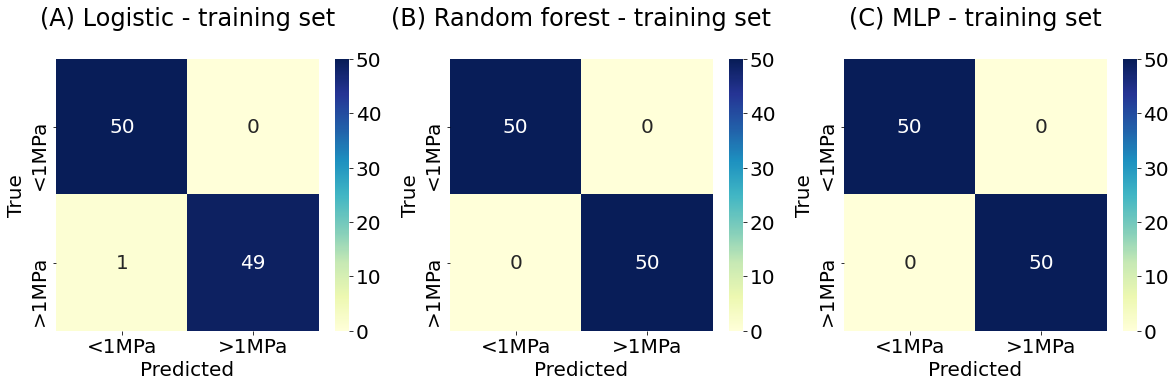

In [131]:
# confusion matrix for model performance - LOGISTIC
cnf_matrix_best1a = metrics.confusion_matrix(y_train_res1b,best_pred1b) # confusion matrix with dropped features training set

fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(1,3,1)
sns.heatmap(pd.DataFrame(cnf_matrix_best1a), annot=True, cmap="YlGnBu", fmt='g') # plot the confusion matrix
plt.title('(A) Logistic - training set', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.xticks(np.arange(0.5,2.5, step = 1),['<1MPa','>1MPa']) # xlabel
plt.yticks(np.arange(0.5,2.5, step = 1),['<1MPa','>1MPa']) # ylabel


# from confusion matrix, compute the number of false positive, false negative, true positive, and true negative
FP_logistic = cnf_matrix_best1a.sum(axis=0) - np.diag(cnf_matrix_best1a) # false positive 
FN_logistic = cnf_matrix_best1a.sum(axis=1) - np.diag(cnf_matrix_best1a) # false negative
TP_logistic = np.diag(cnf_matrix_best1a) # true positive
TN_logistic = cnf_matrix_best1a.sum() - (FP_logistic + FN_logistic + TP_logistic) #true negative

# confusion matrix for model performance - RANDOM FOREST
cnf_matrix_best2a = metrics.confusion_matrix(y_train_res2b, best_pred2b) # confusion matrix for train data

ax = fig.add_subplot(1,3,2)
sns.heatmap(pd.DataFrame(cnf_matrix_best2a), annot=True, cmap="YlGnBu", fmt='g') # plot the confusion matrix
plt.title('(B) Random forest - training set', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.xticks(np.arange(0.5,2.5, step = 1),['<1MPa','>1MPa']) # xlabel
plt.yticks(np.arange(0.5,2.5, step = 1),['<1MPa','>1MPa']) # ylabel

# from confusion matrix, compute the number of false positive, false negative, true positive, and true negative
FP_rfc = cnf_matrix_best2a.sum(axis=0) - np.diag(cnf_matrix_best2a) # false positive
FN_rfc = cnf_matrix_best2a.sum(axis=1) - np.diag(cnf_matrix_best2a) # false negative
TP_rfc = np.diag(cnf_matrix_best2a) # true positive
TN_rfc = cnf_matrix_best2a.sum() - (FP_rfc + FN_rfc + TP_rfc) # true negative

# confusion matrix for model performance - ANN
cnf_matrix_best4a = metrics.confusion_matrix(y_train_res3b, best_pred4b) # confusion matrix for training set

ax = fig.add_subplot(1,3,3)
sns.heatmap(pd.DataFrame(cnf_matrix_best4a), annot=True, cmap="YlGnBu", fmt='g') # plot the confusion matrix
plt.title('(C) MLP - training set', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.xticks(np.arange(0.5,2.5, step = 1),['<1MPa','>1MPa']) # xlabel
plt.yticks(np.arange(0.5,2.5, step = 1),['<1MPa','>1MPa']) # ylabel

print('Best hyperparameters = ',best4.best_estimator_.get_params())

# from confusion matrix, compute the number of false positive, false negative, true positive, and true negative
FP_nn = cnf_matrix_best4a.sum(axis=0) - np.diag(cnf_matrix_best4a)  # false positive
FN_nn = cnf_matrix_best4a.sum(axis=1) - np.diag(cnf_matrix_best4a) # false negative
TP_nn = np.diag(cnf_matrix_best4a) # true positive
TN_nn = cnf_matrix_best4a.sum() - (FP_nn + FN_nn + TP_nn) #true negative

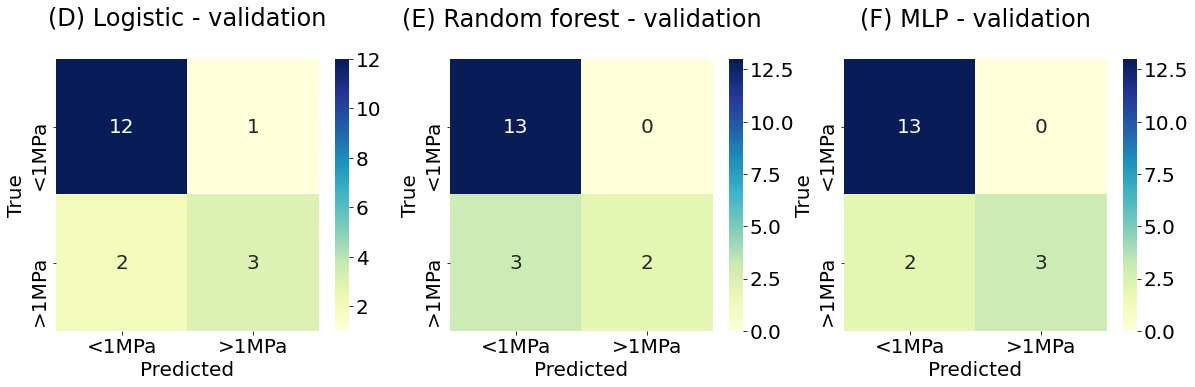

In [132]:
# confusion matrix for model performance - LOGISTIC
cnf_matrix_best1a = metrics.confusion_matrix(y_test1b,best_pred1a) # confusion matrix with dropped features training set

fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(1,3,1)
sns.heatmap(pd.DataFrame(cnf_matrix_best1a), annot=True, cmap="YlGnBu", fmt='g') # plot the confusion matrix
plt.title('(D) Logistic - validation', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.xticks(np.arange(0.5,2.5, step = 1),['<1MPa','>1MPa']) # xlabel
plt.yticks(np.arange(0.5,2.5, step = 1),['<1MPa','>1MPa']) # ylabel


# from confusion matrix, compute the number of false positive, false negative, true positive, and true negative
FP_logistic = cnf_matrix_best1a.sum(axis=0) - np.diag(cnf_matrix_best1a) # false positive 
FN_logistic = cnf_matrix_best1a.sum(axis=1) - np.diag(cnf_matrix_best1a) # false negative
TP_logistic = np.diag(cnf_matrix_best1a) # true positive
TN_logistic = cnf_matrix_best1a.sum() - (FP_logistic + FN_logistic + TP_logistic) #true negative

# confusion matrix for model performance - RANDOM FOREST
cnf_matrix_best2a = metrics.confusion_matrix(y_test2b, best_pred2a) # confusion matrix for train data

ax = fig.add_subplot(1,3,2)
sns.heatmap(pd.DataFrame(cnf_matrix_best2a), annot=True, cmap="YlGnBu", fmt='g') # plot the confusion matrix
plt.title('(E) Random forest - validation', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.xticks(np.arange(0.5,2.5, step = 1),['<1MPa','>1MPa']) # xlabel
plt.yticks(np.arange(0.5,2.5, step = 1),['<1MPa','>1MPa']) # ylabel

# from confusion matrix, compute the number of false positive, false negative, true positive, and true negative
FP_rfc = cnf_matrix_best2a.sum(axis=0) - np.diag(cnf_matrix_best2a) # false positive
FN_rfc = cnf_matrix_best2a.sum(axis=1) - np.diag(cnf_matrix_best2a) # false negative
TP_rfc = np.diag(cnf_matrix_best2a) # true positive
TN_rfc = cnf_matrix_best2a.sum() - (FP_rfc + FN_rfc + TP_rfc) # true negative

# confusion matrix for model performance - ANN
cnf_matrix_best4a = metrics.confusion_matrix(y_test3b, best_pred4a) # confusion matrix for training set

ax = fig.add_subplot(1,3,3)
sns.heatmap(pd.DataFrame(cnf_matrix_best4a), annot=True, cmap="YlGnBu", fmt='g') # plot the confusion matrix
plt.title('(F) MLP - validation', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.xticks(np.arange(0.5,2.5, step = 1),['<1MPa','>1MPa']) # xlabel
plt.yticks(np.arange(0.5,2.5, step = 1),['<1MPa','>1MPa']) # ylabel


# from confusion matrix, compute the number of false positive, false negative, true positive, and true negative
FP_nn = cnf_matrix_best4a.sum(axis=0) - np.diag(cnf_matrix_best4a)  # false positive
FN_nn = cnf_matrix_best4a.sum(axis=1) - np.diag(cnf_matrix_best4a) # false negative
TP_nn = np.diag(cnf_matrix_best4a) # true positive
TN_nn = cnf_matrix_best4a.sum() - (FP_nn + FN_nn + TP_nn) #true negative

Text(0.5, 1.0, '(D) Testing set')

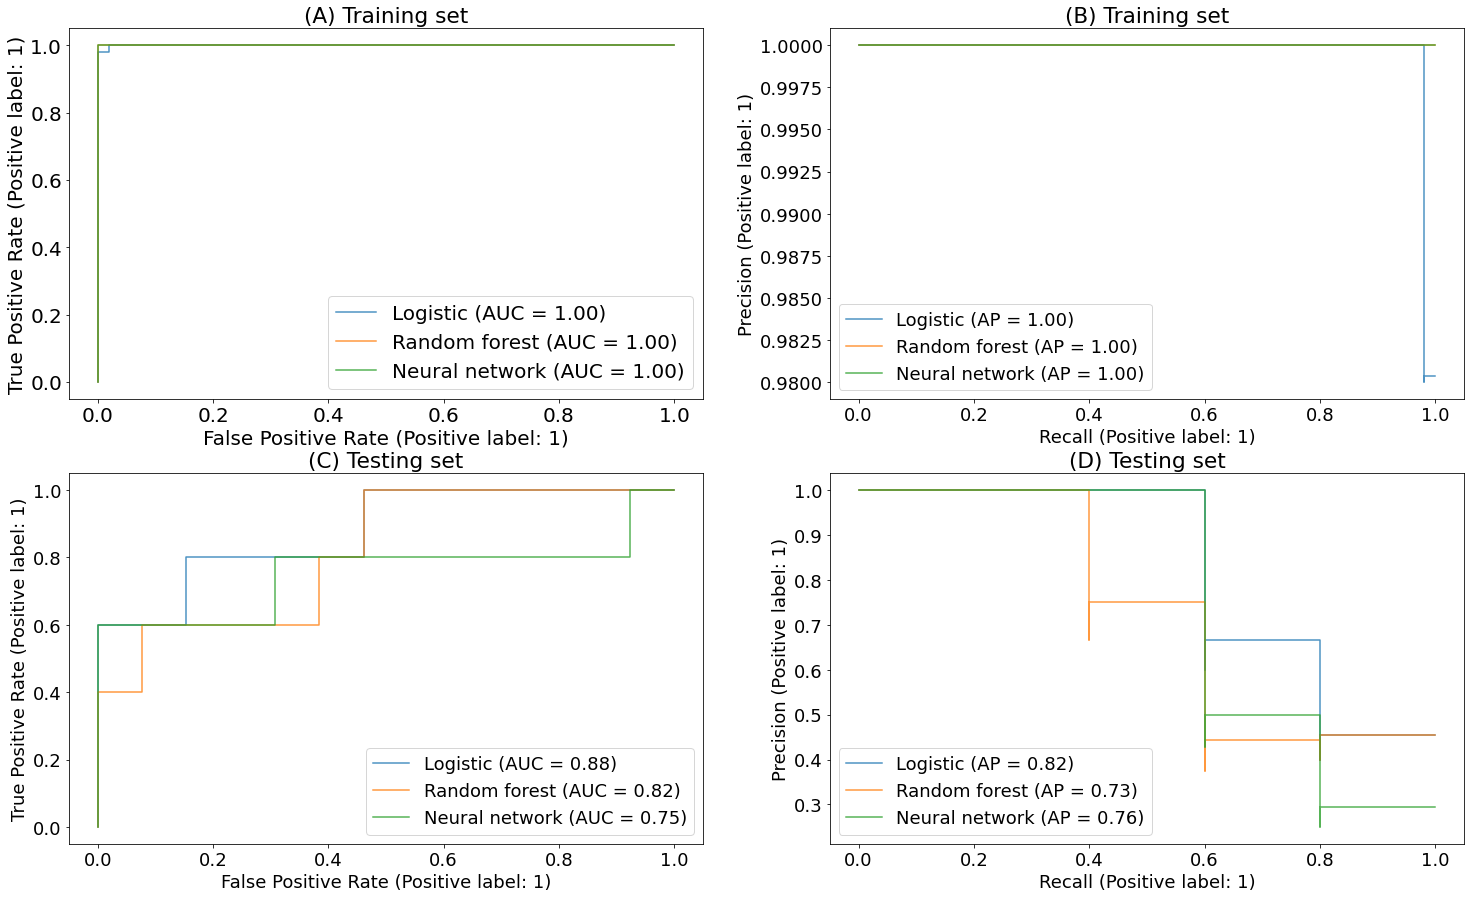

In [133]:
# plot ROC and PR curves for all models
fig = plt.figure(figsize = (25,15))
ax = fig.add_subplot(2,2,1)
metrics.plot_roc_curve(best1, x_train_res1b, y_train_res1b,ax = ax, name ='Logistic',alpha = 0.8)
metrics.plot_roc_curve(best2, x_train_res2b, y_train_res2b, ax = ax,name = 'Random forest',alpha = 0.8)
metrics.plot_roc_curve(best4, x_train_res3b, y_train_res3b, ax = ax, name = 'Neural network',alpha = 0.8)
matplotlib.rcParams.update({'font.size': 18})
plt.title('(A) Training set')
ax = fig.add_subplot(2,2,2)
metrics.plot_precision_recall_curve(best1, x_train_res1b, y_train_res1b, ax = ax, name = 'Logistic', alpha = 0.8) 
metrics.plot_precision_recall_curve(best2, x_train_res2b, y_train_res2b, ax = ax, name = 'Random forest', alpha = 0.8)
metrics.plot_precision_recall_curve(best4, x_train_res3b, y_train_res3b, ax = ax, name = 'Neural network', alpha = 0.8)
plt.title('(B) Training set')
ax = fig.add_subplot(2,2,3)
metrics.plot_roc_curve(best1, x_test1b, y_test1b,ax = ax, name ='Logistic',alpha = 0.8)
metrics.plot_roc_curve(best2, x_test2b, y_test2b, ax = ax,name = 'Random forest',alpha = 0.8)
metrics.plot_roc_curve(best4, x_test3b, y_test3b, ax = ax, name = 'Neural network',alpha = 0.8)
matplotlib.rcParams.update({'font.size': 18})
plt.title('(C) Testing set')
ax = fig.add_subplot(2,2,4)
metrics.plot_precision_recall_curve(best1, x_test1b, y_test1b, ax = ax, name = 'Logistic', alpha = 0.8) 
metrics.plot_precision_recall_curve(best2, x_test2b, y_test2b, ax = ax, name = 'Random forest', alpha = 0.8)
metrics.plot_precision_recall_curve(best4, x_test3b, y_test3b, ax = ax, name = 'Neural network', alpha = 0.8)
plt.title('(D) Testing set')

In [134]:
# print classification report for all models
print('Logistic - testing set')
print(metrics.classification_report(y_test1b, best_pred1a,target_names=['<1MPa', '>1MPa']))

print('Random forest - testing set')
print(metrics.classification_report(y_test2b, best_pred2a,target_names=['<1MPa', '>1MPa']))

print('MLP - testing set')
print(metrics.classification_report(y_test3b, best_pred4a,target_names=['<1MPa', '>1MPa']))


Logistic - testing set
              precision    recall  f1-score   support

       <1MPa       0.86      0.92      0.89        13
       >1MPa       0.75      0.60      0.67         5

    accuracy                           0.83        18
   macro avg       0.80      0.76      0.78        18
weighted avg       0.83      0.83      0.83        18

Random forest - testing set
              precision    recall  f1-score   support

       <1MPa       0.81      1.00      0.90        13
       >1MPa       1.00      0.40      0.57         5

    accuracy                           0.83        18
   macro avg       0.91      0.70      0.73        18
weighted avg       0.86      0.83      0.81        18

MLP - testing set
              precision    recall  f1-score   support

       <1MPa       0.87      1.00      0.93        13
       >1MPa       1.00      0.60      0.75         5

    accuracy                           0.89        18
   macro avg       0.93      0.80      0.84        18
weigh

In [154]:
# make predictions on new recipes using this function that transforms inputs to standardized and encoded features
def make_recipe(wtA,wtB,wtcross):
    # input is the wt% of A and B
    A_name = 'chitosan' # change this value
    B_name = 'acrylamide' # change this value
    C_name = 'na' # change this value
    indexA = x[x['Polymer A name']==A_name].index[0]
    indexB = x[x['Polymer B name']==B_name].index[0]
    indexC = x[x['Polymer C name']==C_name].index[0]
    complexA = x['Polymer A complexity'].iloc[indexA]
    complexB =  x['Polymer B complexity'].iloc[indexB]
    complexC =  x['Polymer C complexity'].iloc[indexC]
    topA = x['Polymer A topological polar surface area'].iloc[indexA]
    topB = x['Polymer B topological polar surface area'].iloc[indexB]
    topC = x['Polymer C topological polar surface area'].iloc[indexC]

    x_new = pd.DataFrame()
    x_new['Number of polymer networks'] = [2] # change this value
    x_new['Polymer A complexity'] = [complexA]
    x_new['Polymer A topological polar surface area'] = [topA]
    x_new['Polymer A wt%'] = wtA # change this value

    x_new['Polymer B complexity'] = [complexB] # change this value
    x_new['Polymer B topological polar surface area'] = [topB]
    x_new['Polymer B wt%'] = wtB  # change this value

    x_new['Polymer C complexity'] = [complexC]
    x_new['Polymer C topological polar surface area'] = [topC]
    x_new['Polymer C wt%'] = [0]  # change this value
    x_new['Polymerization time (min)'] = [1]  # change this value

    x_new['Number of crosslinkers'] = [1]  # change this value
    if wtcross == [0]:
        cross1 = ['na']
    else: 
        cross1 = ['MBA'] # change this value
    x_new['Crosslinker 1 name'] = cross1  
    x_new['Crosslinker 1 wt%'] = wtcross  # change this value
    x_new['Crosslinker 2 name'] = ['na']  # change this value
    x_new['Crosslinker 2 wt%'] = [0]  # change this value
    x_new['Crosslinker 3 name'] = ['na']  # change this value
    x_new['Crosslinker 3 wt%'] = [0]  # change this value

    x_new['Accelerator name'] = ['na']  # change this value
    x_new['Accelerator wt%'] = [0]  # change this value
                            
    x_new['Initiation type'] = ['photo']  # change this value
    x_new['initiator wt %']=[0.01]  # change this value
    x_new['pH of immersion solvent']=[7]   # change this value

    
    # encode the features
    col_names_new = x_new.columns
    x_en_new = pd.DataFrame()
    for j in range(len(col_names_new)):
        column = col_names_new[j]
        if x_new[column].dtype == object:
            temp_new = pd.get_dummies(x_new[column],prefix = column)
        else:
            temp_new = x_new[column]
        x_en_new = pd.concat([x_en_new,temp_new],axis = 1)
    
    
    
     # add polymer A,B,C descriptors to x_new
    A_name_index = df_PadelA[df_PadelA['A_Name'] == A_name].index
    B_name_index = df_PadelB[df_PadelB['B_Name'] == B_name].index
    C_name_index = df_PadelC[df_PadelC['C_Name'] == C_name].index
    
  
    for column in df_PadelA.columns: # add padel descriptors
        if column != 'A_Name':
            x_en_new[column] = [df_PadelA[column].iloc[A_name_index]]
    for column in df_PadelB.columns:
        if column != 'B_Name':
            x_en_new[column] = [df_PadelB[column].iloc[B_name_index]]
    for column in df_PadelC.columns:
        if column != 'C_Name':
            x_en_new[column] = [df_PadelC[column].iloc[C_name_index]]
    

     #add the missing features
    for column in x_en.columns:
        if column not in x_en_new.columns:
            x_en_new[column]=[0]
    
  
    # transform the new recipe values via standardization
    for column in avg.columns:
        x_en_new[column] = [(x_en_new[column] - avg[column])/stdeviat[column]]
      
    # predict using the random forest model
    really_keep = feature_importances[0:20].index # use the top 20 features
    x_en_new_keep = x_en_new[really_keep]
    
    return x_en_new_keep        

In [155]:
# making prediction with the function make_recipe which takes in wt% of polymer A, wt% of polymer B and crosslinker wt%
x_en_new_keep = make_recipe([2],[30],[0.025])
prediction = best4.predict(x_en_new_keep) # use the logistic model with the best hyperparameter to predict

if prediction == 1:
    print('Result: >1MPa')
else:
    print('Result: <1MPa')


Result: <1MPa


In [159]:
print(y_test1b,best_pred1a)

[0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0] [0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0]
